In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [232]:
budget = np.array([5,10,17,27,35,40,42,49,54,60])
revenue = np.array([2.6,19,23.8,26.9,41.1,58.3,40.3,58.7,73.1,69.7])

In [233]:
df = pd.DataFrame(data = {'revenue':revenue,'budget':budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


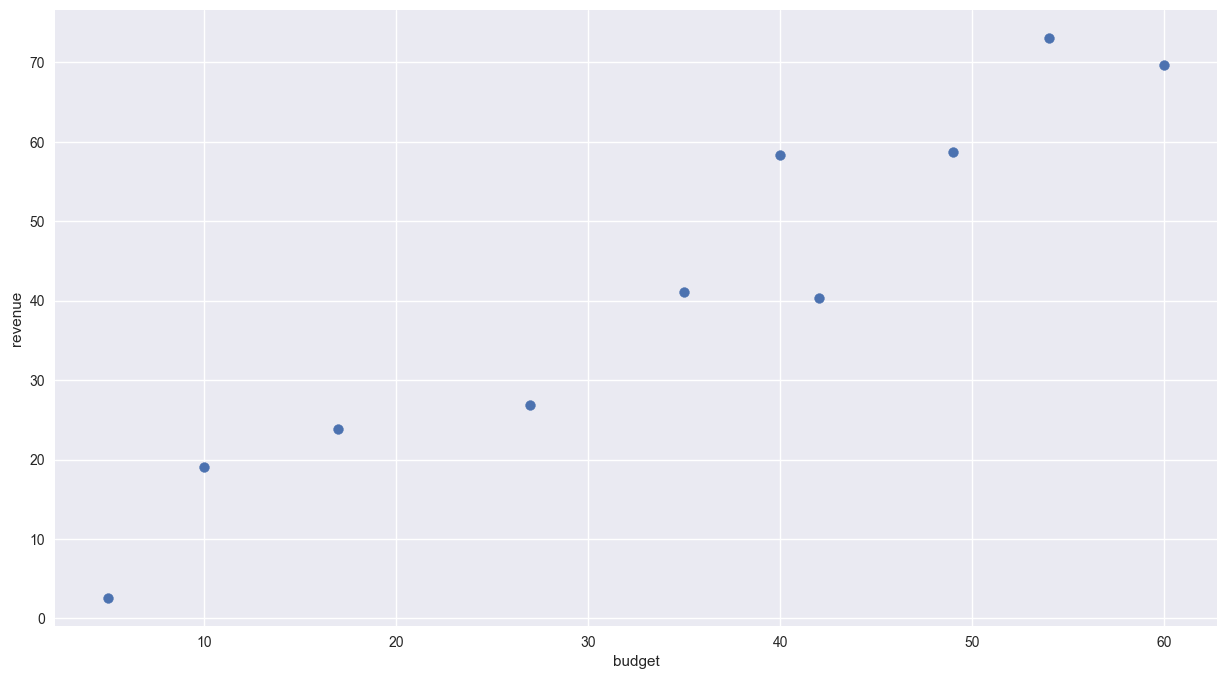

In [234]:
df.plot(kind='scatter', x='budget',y='revenue',figsize=(15,8), s = 50)
plt.show()

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
lm = LinearRegression(fit_intercept=True)

In [237]:
df['budget']

0     5
1    10
2    17
3    27
4    35
5    40
6    42
7    49
8    54
9    60
Name: budget, dtype: int32

In [238]:
df['revenue']

0     2.6
1    19.0
2    23.8
3    26.9
4    41.1
5    58.3
6    40.3
7    58.7
8    73.1
9    69.7
Name: revenue, dtype: float64

In [239]:
lm.fit(X=df['budget'].to_frame(), y=df['revenue'])

LinearRegression()

In [240]:
intercept = lm.intercept_
slope = lm.coef_
print(slope,intercept)

[1.19897684] 0.7046849757673712


In [241]:
df['pred_revenue'] = lm.predict(df['budget'].to_frame())
df

,revenue,budget,pred_revenue
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [242]:
x_lin = np.array([0,100])
y_line = x_lin*slope + intercept

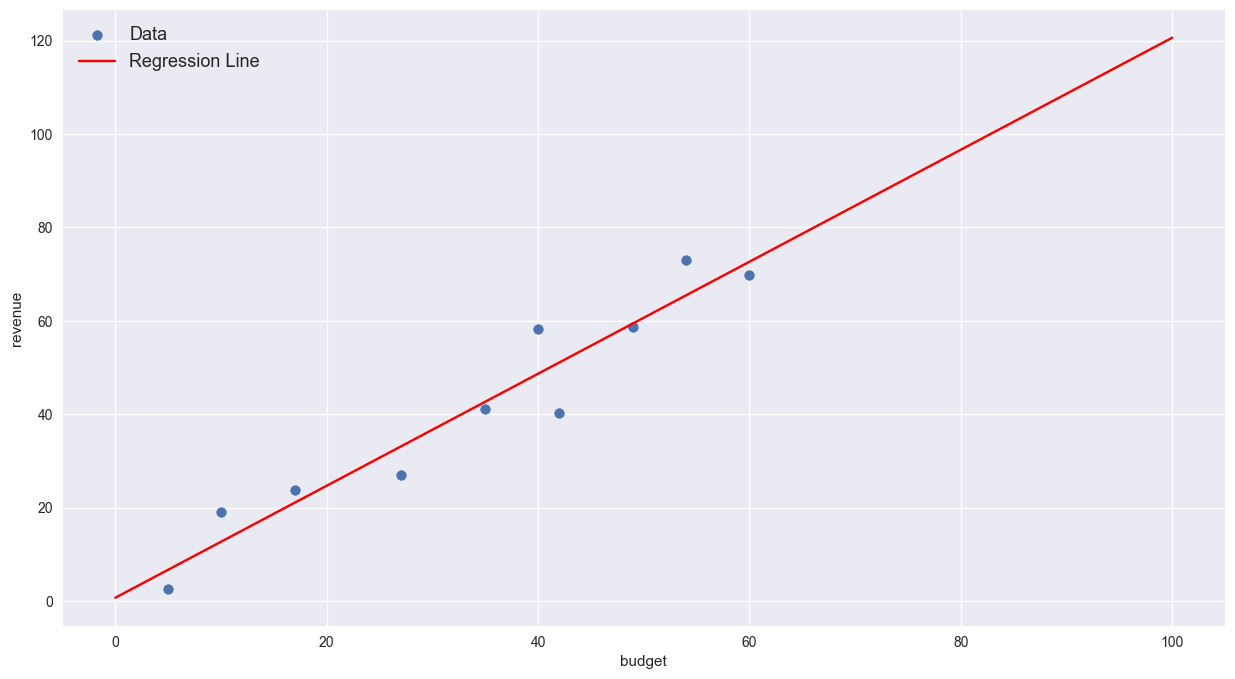

In [243]:
df.plot(kind='scatter', x='budget',y='revenue',figsize=(15,8), s = 50, label = 'Data')
plt.plot(x_lin,y_line, c = 'red', label = 'Regression Line')
plt.legend(fontsize = 13)
plt.show()

In [244]:
budget_new = np.array([63,66,74,80,85])
revenue_new = np.array([74.2,80.7,98.2,94.8,101.7])

In [245]:
df_new = pd.DataFrame(data = {'revenue':revenue_new, 'budget':budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [246]:
df_new['pred_revenue'] = lm.predict(df_new['budget'].to_frame())
df_new

,revenue,budget,pred_revenue
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


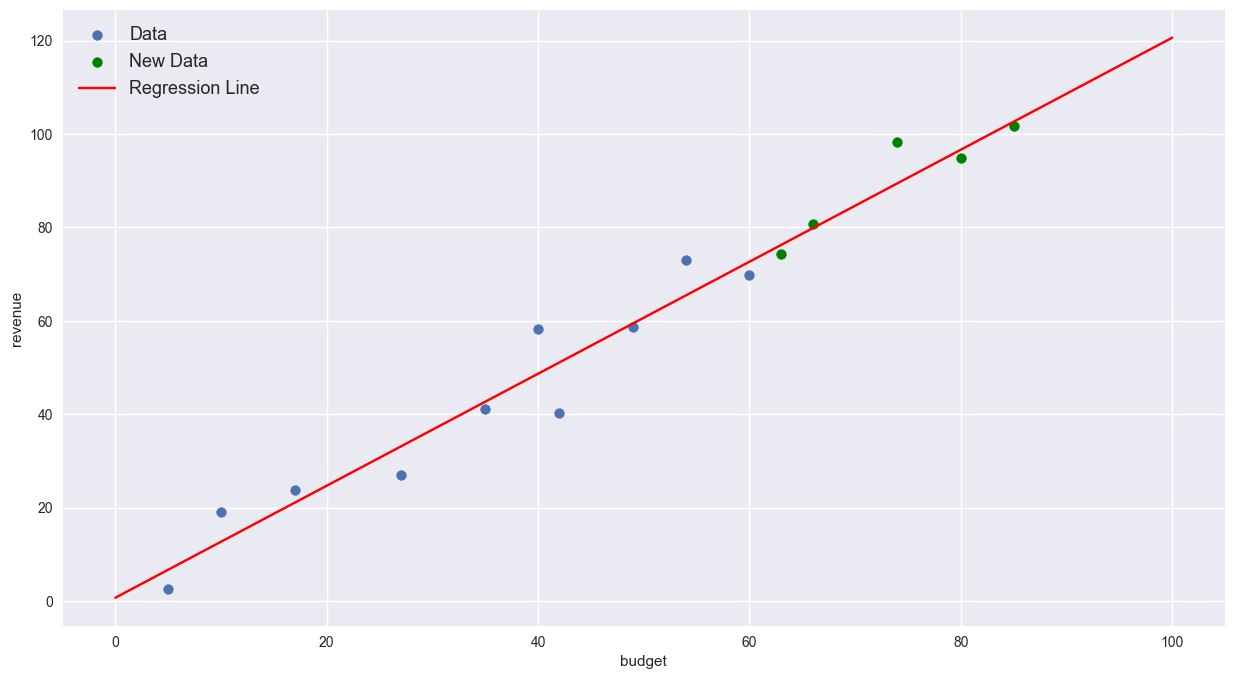

In [247]:
df.plot(kind='scatter', x='budget',y='revenue',figsize=(15,8), s = 50, label = 'Data')
plt.scatter(x=df_new['budget'],y=df_new['revenue'], s = 50, c = 'green' ,label = 'New Data')
plt.plot(x_lin,y_line, c = 'red', label = 'Regression Line')
plt.legend(fontsize = 13)
plt.show()

In [248]:
poly_m = np.polyfit(x = df['budget'], y =df['revenue'], deg = 9)

In [249]:
poly_m

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254338e+03, -1.21710591e+04])

In [250]:
x_poly = np.linspace(0,100,1000)
y_poly = np.polyval(poly_m,x_poly)

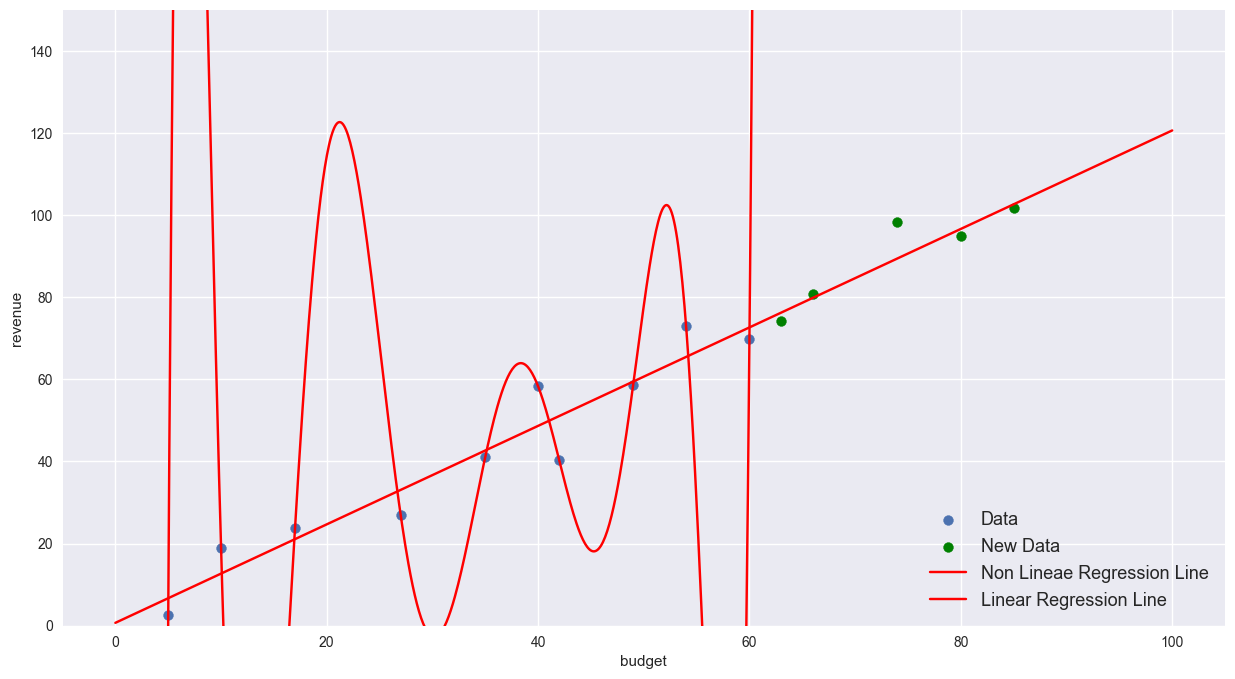

In [251]:
df.plot(kind='scatter', x='budget',y='revenue',figsize=(15,8), s = 50, label = 'Data')
plt.scatter(x=df_new['budget'],y=df_new['revenue'], s = 50, c = 'green' ,label = 'New Data')
plt.plot(x_poly,y_poly, c = 'red', label = 'Non Lineae Regression Line')
plt.plot(x_lin,y_line, c = 'red', label = 'Linear Regression Line')
plt.legend(fontsize = 13)
plt.ylim(0,150)
plt.show()

In [252]:
data = pd.read_csv('five_minute.csv', index_col= 'time', parse_dates= ['time'])
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


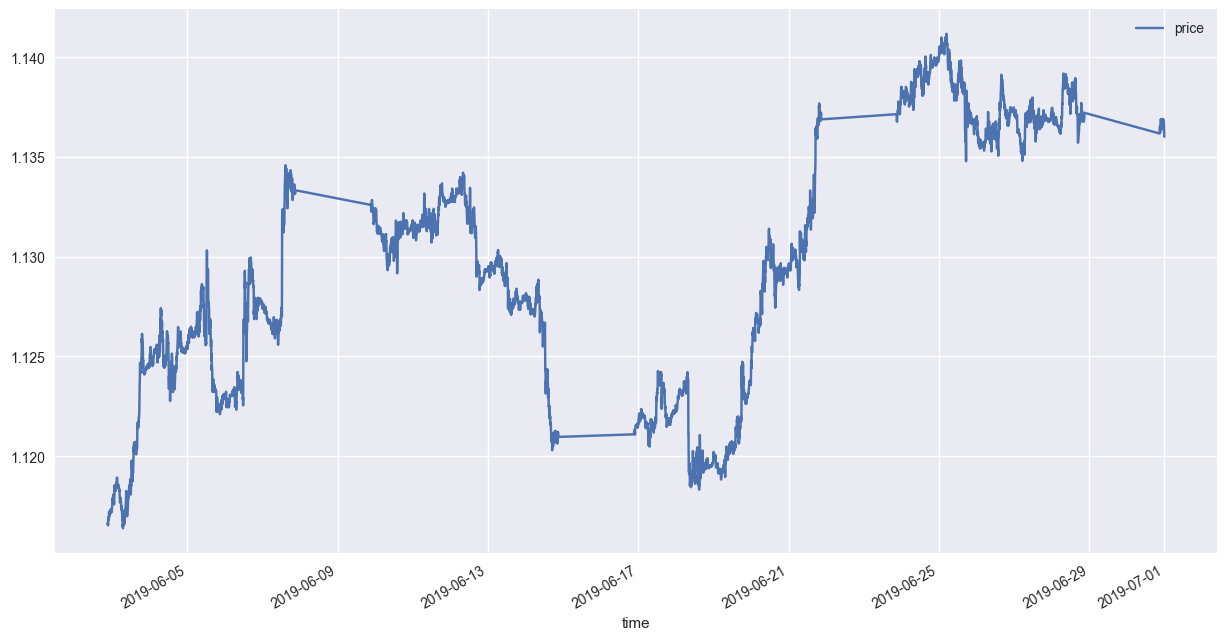

In [254]:
data.loc['2019-06'].plot(figsize=(15,8))
plt.show()

In [255]:
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [256]:
data['return'] = np.log(data['price']/data['price'].shift(1))
data

,price,return
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [257]:
data['lag1'] = data['return'].shift(1)

In [258]:
data

,price,return,lag1
time,,,
2019-01-01 22:00:00+00:00,1.146580,NaN,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201,NaN
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [259]:
data.dropna(inplace= True)
data

,price,return,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


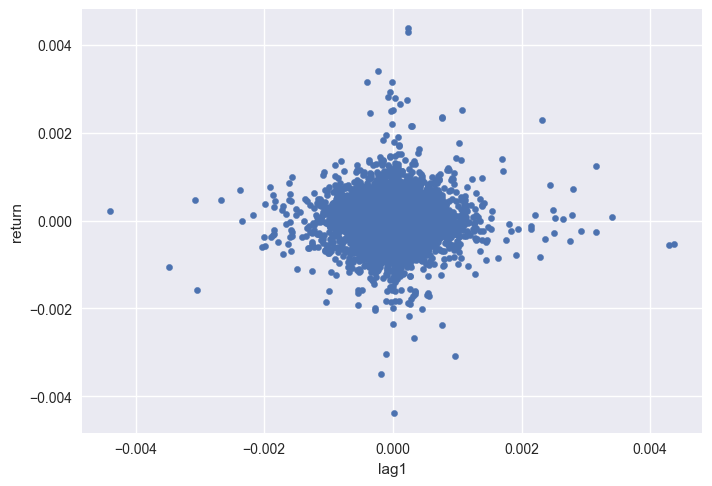

In [260]:
data.plot(kind='scatter', x = "lag1", y = 'return')
plt.show()

In [261]:
data

,price,return,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [262]:
lags = 5

In [263]:
data = pd.read_csv('five_minute.csv', index_col= 'time', parse_dates= ['time'])
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [264]:
data['return'] = np.log(data['price']/data['price'].shift(1))
data

,price,return
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [265]:
data['return'] = np.log(data['price']/data['price'].shift(1))

cols = []
for i in [1,2,3,4,5]:
    data['lag{}'.format(i)] = data['return'].shift(i)
    cols.append('lag{}'.format(i))


data.dropna(inplace=True)
data

,price,return,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [266]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [267]:
lm = LinearRegression(fit_intercept=True)

In [268]:
lm.fit(data[cols],data['return'])

LinearRegression()

In [269]:
lm.intercept_

-3.278292441995064e-07

In [270]:
lm.coef_

array([-0.03358358, -0.00243139,  0.00365238, -0.00366896, -0.00360391])

In [271]:
data['pred'] = lm.predict(data[cols].values)

c:\Users\email\OneDrive\Desktop\ml\my.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [272]:
data['pred'] = np.sign(data['pred'])
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [273]:
data['pred'].value_counts()

pred
-1.0    39610
 1.0    34104
Name: count, dtype: int64

In [274]:
data['hits'] = np.sign(data['pred']*data['return'])
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred,hits
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0,1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0,-1.0


In [275]:
data['hits'].value_counts()[1]

37493

In [276]:
data['hits'].count()

73714

In [277]:
hits_ratio = (data['hits'].value_counts()[1]/data['hits'].count())*100
hits_ratio

50.86279404183737

In [278]:
data['strategy'] = data['pred']*data['return']

In [279]:

data['cstart'] = data['strategy'].cumsum()
data['creturn'] = data['return'].cumsum()
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred,hits,strategy,cstart,creturn
time,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-1.0,-0.000017,-0.000017,-1.744493e-05
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.0,0.000000,-0.000017,-1.744493e-05
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0,1.0,0.000074,0.000057,-9.158927e-05
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-1.0,-0.000048,0.000009,-1.395680e-04
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,1.0,0.000140,0.000148,-8.023096e-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-1.0,-0.000004,0.418378,-2.320263e-02
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0,-1.0,-0.000027,0.418351,-2.317585e-02
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0,-1.0,-0.000076,0.418276,-2.309997e-02


In [280]:
data['strategy'].mean()*252*24*60/5

0.41170828682404315

In [281]:
data = pd.read_csv('test_set.csv', index_col= 'time', parse_dates= ['time'])
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [282]:
data['return'] = np.log(data['price']/data['price'].shift(1))

cols = []
for i in [1,2,3,4,5]:
    data['lag{}'.format(i)] = data['return'].shift(i)
    cols.append('lag{}'.format(i))


data.dropna(inplace=True)
data

,price,return,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [283]:
data['pred'] = lm.predict(data[cols].values)
data

c:\Users\email\OneDrive\Desktop\ml\my.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,price,return,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.172394e-06
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-8.499182e-07
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-2.404767e-06
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-4.129965e-07
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,9.090211e-07
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,2.762520e-06
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,3.494904e-06
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.145903e-05


In [284]:
data['pred'] = np.sign(data['pred'])
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0


In [285]:
data['hits'] = np.sign(data['pred']*data['return'])
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred,hits
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-1.0,-1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-1.0,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-1.0,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0,-1.0


In [286]:
hits_ratio = (data['hits'].value_counts()[1]/data['hits'].count())*100
hits_ratio

50.637142683495064

In [287]:
data['strategy'] = data['pred']*data['return']
data['cstart'] = data['strategy'].cumsum()
data['creturn'] = data['return'].cumsum()
data

,price,return,lag1,lag2,lag3,lag4,lag5,pred,hits,strategy,cstart,creturn
time,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0,1.0,0.000004,0.000004,4.458245e-06
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-1.0,-1.0,-0.000031,-0.000027,3.566541e-05
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-1.0,1.0,0.000004,-0.000022,3.120730e-05
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-1.0,1.0,0.000031,0.000009,-9.303132e-17
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0,1.0,0.000357,0.000366,3.565968e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0,-1.0,-0.000080,0.298337,6.002468e-02
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0,1.0,0.000290,0.298627,6.031433e-02
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0,-1.0,-0.000231,0.298396,6.054516e-02


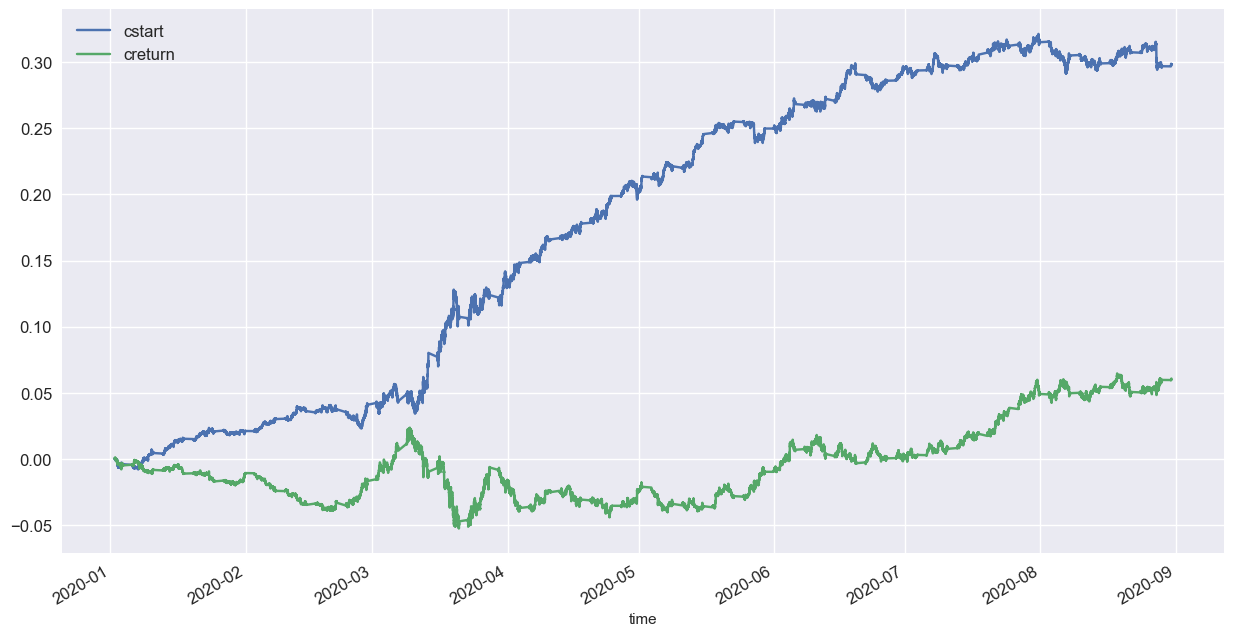

In [288]:
data[['cstart','creturn']].plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [289]:
hours = np.array([0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5])

In [290]:
success = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

In [291]:
hours.size

20

In [292]:
success.size

20

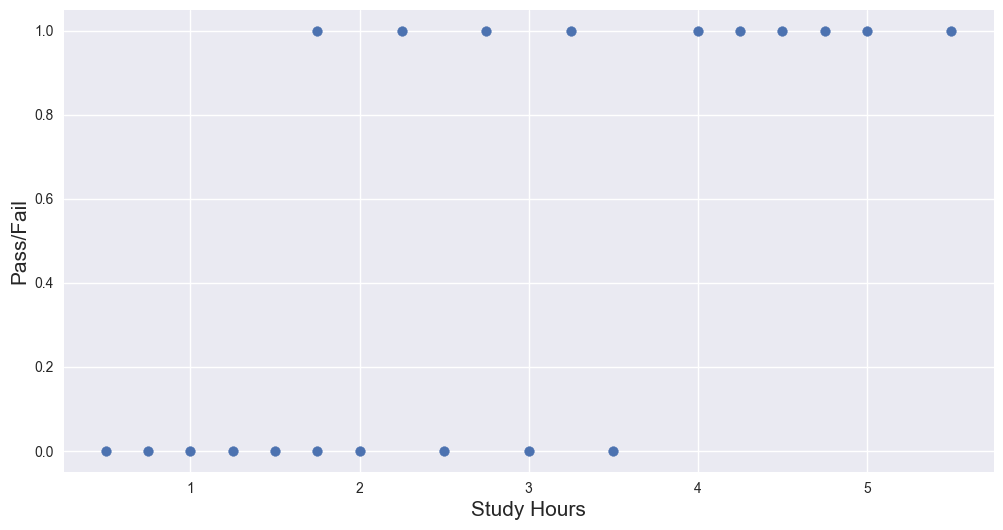

In [293]:
plt.figure(figsize=(12,6))
plt.scatter(hours,success)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.show()

In [294]:
data = pd.DataFrame({'hours':hours,'pass':success})
data

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


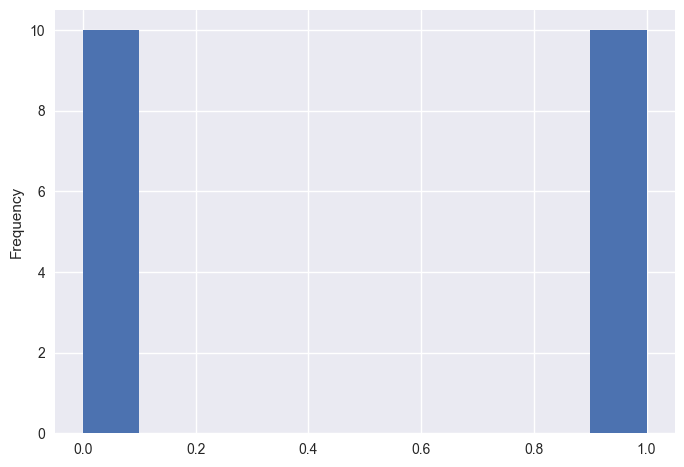

In [295]:
data['pass'].plot(kind = 'hist')
plt.show()

In [296]:
lm = LinearRegression(fit_intercept=True)

In [297]:
lm.fit(data['hours'].to_frame(),data['pass'])

LinearRegression()

In [298]:
lm.coef_

array([0.23459561])

In [299]:
lm.intercept_

-0.15393526898848708

In [300]:
data['pred'] = lm.predict(data['hours'].to_frame())
data

,hours,pass,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
lm = LogisticRegression()

In [303]:
data

,hours,pass,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [304]:
lm.fit(data['hours'].to_frame(),data['pass'])

LogisticRegression()

In [305]:
lm.classes_

array([0, 1])

In [306]:
lm.coef_

array([[1.14881183]])

In [307]:
data['pred'] = lm.predict(data['hours'].to_frame())
data

,hours,pass,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


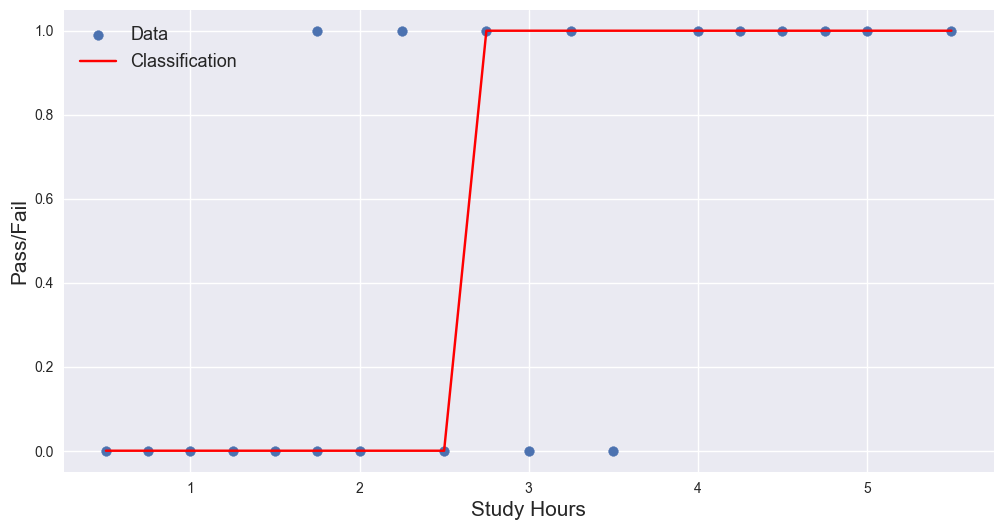

In [308]:
plt.figure(figsize=(12,6))
plt.scatter(data['hours'],data['pass'], label = 'Data')
plt.plot(data['hours'], data['pred'], color = 'red', label = 'Classification')
plt.legend(fontsize=13)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.show()

In [309]:
prob = lm.predict_proba(data['hours'].to_frame())
prob

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])

In [310]:
data

,hours,pass,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


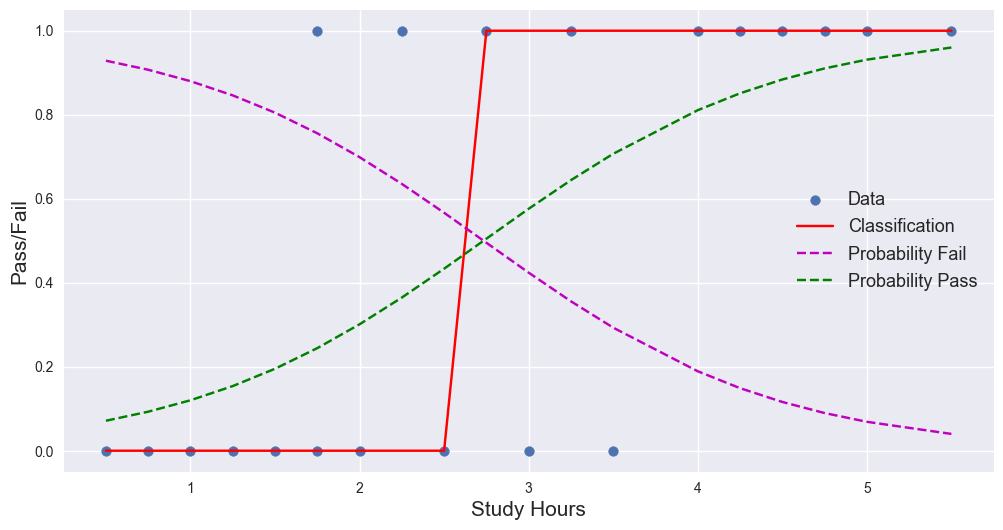

In [311]:
plt.figure(figsize=(12,6))
plt.scatter(data['hours'],data['pass'], label = 'Data')
plt.plot(data['hours'], data['pred'], color = 'red', label = 'Classification')
plt.plot(data['hours'], prob[:,0],'m--', label= 'Probability Fail')
plt.plot(data['hours'], prob[:,1],'g--', label= 'Probability Pass')
plt.legend(fontsize=13)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.show()

In [312]:
data = pd.read_csv('five_minute.csv', parse_dates=['time'], index_col= 'time')
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [313]:
data['returns'] = np.log(data['price']/data['price'].shift(1))
data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [314]:
data.dropna(inplace=True)
data

,price,returns
time,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
2019-01-01 22:25:00+00:00,1.146475,-0.000048
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [315]:
data['direction'] = np.sign(data['returns'])
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [316]:
data['direction'].value_counts()

direction
 1.0    36058
-1.0    35702
 0.0     1959
Name: count, dtype: int64

In [317]:
for i in [1,2,3,4,5]:
    data['lag{}'.format(i)] = data['returns'].shift(i)

data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0,NaN,NaN,NaN,NaN,NaN
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0,-0.000201,NaN,NaN,NaN,NaN
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0,-0.000026,-0.000201,NaN,NaN,NaN
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0,0.000000,-0.000026,-0.000201,NaN,NaN
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0,0.000183,0.000000,-0.000026,-0.000201,NaN
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [318]:
data.dropna(inplace=True)
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [319]:
cols = []
for i in [1,2,3,4,5]:
    cols.append('lag{}'.format(i))

cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [320]:
means = data[cols].mean()
stds = data[cols].std()

In [321]:
data[cols] = (data[cols]-means)/stds
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981


In [351]:
lm = LogisticRegression(C = 1e6 , max_iter=100000, multi_class='ovr')

In [354]:
from sklearn.multiclass import OneVsOneClassifier

In [352]:
lm.fit(data[cols], data['direction'])

c:\Users\email\OneDrive\Desktop\ml\my.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [355]:
lm = OneVsOneClassifier(LogisticRegression(C = 1e6 , max_iter=100000))

In [356]:
lm.fit(data[cols], data['direction'])

OneVsOneClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

In [357]:
data['pred'] = lm.predict(data[cols])
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,cstrat,creturn
time,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816,1.0,-0.000017,-0.000017,-1.744493e-05
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216,1.0,0.000000,-0.000017,-1.744493e-05
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591,-1.0,0.000074,0.000057,-9.158927e-05
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169,1.0,-0.000048,0.000009,-1.395680e-04
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020,1.0,0.000140,0.000148,-8.023096e-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175,1.0,-0.000004,0.436821,-2.320263e-02
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887,1.0,0.000027,0.436847,-2.317585e-02
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981,1.0,0.000076,0.436923,-2.309997e-02


In [358]:
hits = np.sign(data['direction']*data['pred']).value_counts()
hits

 1.0    37638
-1.0    34118
 0.0     1958
Name: count, dtype: int64

In [326]:
hits[1]

37636

In [327]:
hits[-1]

34120

In [328]:
hits[0]

1958

In [329]:
hits.sum()

73714

In [330]:
hits_ratio = hits[1.0]/hits.sum()
hits_ratio

0.5105678704181024

In [331]:
data['strategy'] = data['pred']*data['returns']

In [332]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy
time,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816,1.0,-0.000017
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216,1.0,0.000000
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591,-1.0,0.000074
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169,1.0,-0.000048
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020,1.0,0.000140
...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175,1.0,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887,1.0,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981,1.0,0.000076


In [333]:
data['cstrat'] = data['strategy'].cumsum()
data['creturn'] = data['returns'].cumsum()
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,cstrat,creturn
time,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816,1.0,-0.000017,-0.000017,-1.744493e-05
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216,1.0,0.000000,-0.000017,-1.744493e-05
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591,-1.0,0.000074,0.000057,-9.158927e-05
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169,1.0,-0.000048,0.000009,-1.395680e-04
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020,1.0,0.000140,0.000148,-8.023096e-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175,1.0,-0.000004,0.436821,-2.320263e-02
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887,1.0,0.000027,0.436847,-2.317585e-02
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981,1.0,0.000076,0.436923,-2.309997e-02


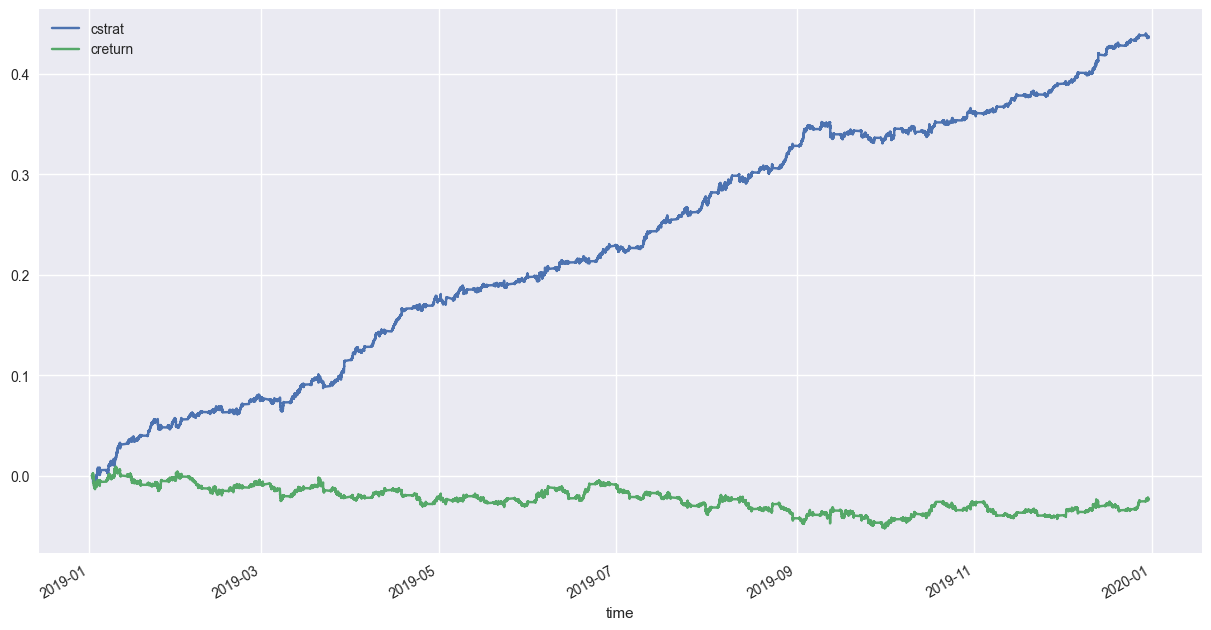

In [334]:
data[['cstrat','creturn']].plot(figsize=(15,8))
plt.show()

In [335]:
df = pd.read_csv('test_set.csv', parse_dates=['time'], index_col='time')
df

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [336]:
df['returns'] = np.log(df['price']/df['price'].shift(1))
df

,price,returns
time,,
2020-01-01 22:00:00+00:00,1.121325,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067
2020-01-01 22:10:00+00:00,1.121250,0.000000
2020-01-01 22:15:00+00:00,1.121460,0.000187
2020-01-01 22:20:00+00:00,1.121540,0.000071
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [337]:
df['direction'] = np.sign(df['returns'])
df

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [338]:
cols = []
for i in [1,2,3,4,5]:
    df['lag{}'.format(i)] = df['returns'].shift(i)
    cols.append('lag{}'.format(i))

df

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0,-0.000067,NaN,NaN,NaN,NaN
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0,0.000000,-0.000067,NaN,NaN,NaN
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0,0.000187,0.000000,-0.000067,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [339]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [340]:
df.dropna(inplace=True)
df

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [359]:
df['pred'] = lm.predict(df[['lag1','lag2','lag3','lag4','lag5']])
df

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,1.0


In [345]:
df['pred'].value_counts()

pred
1.0    49361
Name: count, dtype: int64

In [364]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,cstrat,creturn
time,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816,1.0,-0.000017,-0.000017,-1.744493e-05
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216,1.0,0.000000,-0.000017,-1.744493e-05
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591,-1.0,0.000074,0.000057,-9.158927e-05
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169,1.0,-0.000048,0.000009,-1.395680e-04
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020,1.0,0.000140,0.000148,-8.023096e-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175,1.0,-0.000004,0.436821,-2.320263e-02
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887,1.0,0.000027,0.436847,-2.317585e-02
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981,1.0,0.000076,0.436923,-2.309997e-02


In [360]:
means = data[cols].mean()
std = data[cols].std()

In [362]:
means

lag1    9.253616e-18
lag2    9.639183e-19
lag3   -1.233815e-17
lag4    4.241241e-18
lag5   -1.253094e-17
dtype: float64

In [363]:
std

lag1    1.0
lag2    1.0
lag3    1.0
lag4    1.0
lag5    1.0
dtype: float64

In [361]:
df[cols] = (data[cols]-means)/std
df

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,NaN,NaN,NaN,NaN,NaN,1.0
